In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn import preprocessing
from kmodes.kmodes import KModes

In [2]:
bank = pd.read_csv('C:/Users/PC/Desktop/Prueba/bank-additional-full.csv')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.age.count()

41188

In [5]:
# Importing Categorical Columns

bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]



In [6]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [112]:
bank_cust.age.count()

41188

In [113]:
# Converting age into categorical variable.
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)


In [114]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [115]:
bank_cust.job.count()

41188

In [116]:

# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()



In [117]:
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [118]:
#bank_cust.to_csv('C:/Users/PC/Desktop/Tesis/Practicum4_SistemasInteligentes_UTPL/DataSet/Fernando.csv')

In [ ]:
###

In [119]:
#Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [120]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [121]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [122]:
# Mode of the clusters
clusterCentroidsDf



,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


In [123]:
#Using K-Mode with "Huang" initialization

In [124]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7629, cost: 200707.0
Run 1, iteration: 2/100, moves: 336, cost: 200707.0


In [126]:
# Predicted clusters
fitClusters_huang


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [127]:
#Choosing K by comparing Cost against each K

In [128]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


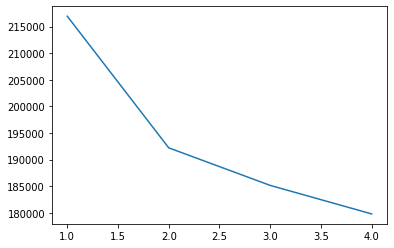

In [129]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [130]:
## Choosing K=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [131]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [132]:
#Combining the predicted clusters with the original DF
bank_cust = bank_cust_copy.reset_index()

In [133]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [134]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


In [135]:
#Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [137]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                28293 non-null  object  
 1   marital            28293 non-null  object  
 2   education          28293 non-null  object  
 3   default            28293 non-null  object  
 4   housing            28293 non-null  object  
 5   loan               28293 non-null  object  
 6   contact            28293 non-null  object  
 7   month              28293 non-null  object  
 8   day_of_week        28293 non-null  object  
 9   poutcome           28293 non-null  object  
 10  age_bin            28293 non-null  category
 11  cluster_predicted  28293 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 2.5+ MB


In [138]:
cluster_0.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,20-30,0
13,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,nonexistent,50-60,0
14,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,nonexistent,30-40,0


In [139]:
cluster_1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1
5,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,40-50,1
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,50-60,1


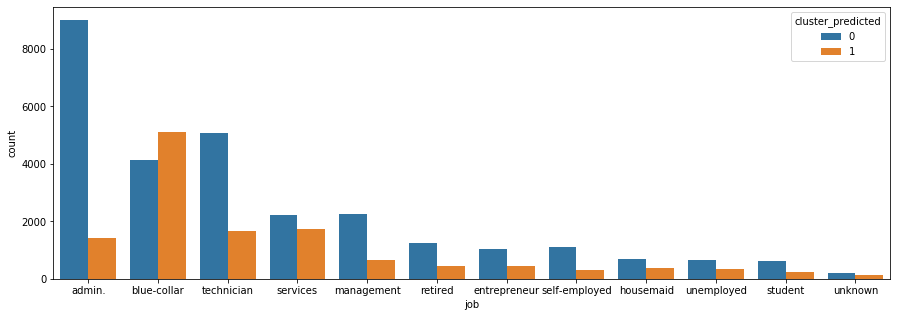

In [140]:
# Job
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()